# Deconvolve simulated data with linear functions, vary number of samples

In [1]:
import anndata
import matplotlib.pylab as plt
import torch
from ternadecov.time_deconv import *
from ternadecov.simulator import *
from ternadecov.stats_helpers import *
from ternadecov.dataset import *
from ternadecov.deconvolution_plotter import *
from ternadecov.parametrization import *
from ternadecov.evaluation import evaluate_with_trajectory
from ternadecov.deconvolution_writer import DeconvolutionWriter
from ternadecov.deconvolution_exporter import DeconvolutionExporter

# Configure

In [2]:
n_iters = 10_000

# Load data

In [3]:
#bulk_anndata_path = "/home/nbarkas/disk1/work/deconvolution_method/datasets/ebov/load_data_python/ebov_bulk.h5ad"
sc_anndata_path = "/home/nbarkas/disk2/deconvolution_method/datasets/ebov/load_data_python/ebov_sc.h5ad"

In [4]:
with open(sc_anndata_path, 'rb') as fh:
    sc_anndata = anndata.read_h5ad(fh)

# Simulate data

In [5]:
types = DeconvolutionDatatypeParametrization()

In [6]:
ebov_sc_dataset = SingleCellDataset(
    sc_anndata, 
    sc_celltype_col="Subclustering_reduced", 
    dtype_np=types.dtype_np, dtype = types.dtype, device=types.device)

In [7]:
# trajectory generating function
trajectory_type = 'periodic'
n_sample_range = list(range(100,2000,100)) 
n_sample_range

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900]

In [8]:
# Use a single trajectory for all iterations
trajectory_coef = sample_trajectories(
    type = trajectory_type,
    num_cell_types = ebov_sc_dataset.w_hat_gc.shape[1]
)

In [9]:
n_samples = []
l1_error_norm = []
fit_time = []

for n in n_sample_range:
    eval_result = evaluate_with_trajectory(
        sc_dataset = ebov_sc_dataset, 
        n_samples = n, 
        trajectory_type = trajectory_type, 
        trajectory_coef = trajectory_coef,
        n_iters = n_iters,
        types = DeconvolutionDatatypeParametrization(),
        deconvolution_params = {
            'trajectory_model_type': 'gp',
            'hyperparameters': TimeRegularizedDeconvolutionModelParametrization(),
            'trajectory_hyperparameters': TimeRegularizedDeconvolutionGPParametrization(),
        }
    )
    
    n_samples.append(eval_result['n_samples'])
    l1_error_norm.append(eval_result['l1_error_norm'])
    fit_time.append(eval_result['fit_time'])

/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.46281e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3144 genes selected
[step: 0, time: 1 s ] loss: 3324808.64
[step: 1000, time: 26 s ] loss: 2302231.71
[step: 2000, time: 51 s ] loss: 1858522.87
[step: 3000, time: 76 s ] loss: 1676891.53
[step: 4000, time: 101 s ] loss: 1613009.88
[step: 5000, time: 127 s ] loss: 1592063.73
[step: 6000, time: 152 s ] loss: 1585352.68
[step: 7000, time: 178 s ] loss: 1583625.02
[step: 8000, time: 204 s ] loss: 1583374.06
[step: 9000, time: 229 s ] loss: 1583272.66


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.29813e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3244 genes selected
[step: 0, time: 1 s ] loss: 6923058.39
[step: 1000, time: 44 s ] loss: 4772258.80
[step: 2000, time: 89 s ] loss: 3851306.34
[step: 3000, time: 133 s ] loss: 3480610.77
[step: 4000, time: 178 s ] loss: 3337443.47
[step: 5000, time: 224 s ] loss: 3290847.76
[step: 6000, time: 270 s ] loss: 3276531.36
[step: 7000, time: 316 s ] loss: 3272909.32
[step: 8000, time: 363 s ] loss: 3272145.32
[step: 9000, time: 409 s ] loss: 3272082.56


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28519e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3250 genes selected
[step: 0, time: 1 s ] loss: 10320764.79
[step: 1000, time: 71 s ] loss: 7158127.57
[step: 2000, time: 142 s ] loss: 5773050.36
[step: 3000, time: 213 s ] loss: 5206066.83
[step: 4000, time: 285 s ] loss: 4998523.53
[step: 5000, time: 357 s ] loss: 4928637.26
[step: 6000, time: 431 s ] loss: 4907690.65
[step: 7000, time: 504 s ] loss: 4902578.72
[step: 8000, time: 577 s ] loss: 4901590.13
[step: 9000, time: 650 s ] loss: 4901407.57


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.27233e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3289 genes selected
[step: 0, time: 1 s ] loss: 13745174.41
[step: 1000, time: 90 s ] loss: 9628720.96
[step: 2000, time: 180 s ] loss: 7775078.31
[step: 3000, time: 270 s ] loss: 7014025.14
[step: 4000, time: 362 s ] loss: 6731639.92
[step: 5000, time: 455 s ] loss: 6636535.62
[step: 6000, time: 549 s ] loss: 6608258.58
[step: 7000, time: 643 s ] loss: 6600938.22
[step: 8000, time: 738 s ] loss: 6599449.08
[step: 9000, time: 831 s ] loss: 6599389.01


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.27092e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3308 genes selected
[step: 0, time: 1 s ] loss: 17480036.09
[step: 1000, time: 124 s ] loss: 12137004.47
[step: 2000, time: 248 s ] loss: 9790696.88
[step: 3000, time: 371 s ] loss: 8816782.49
[step: 4000, time: 497 s ] loss: 8461355.75
[step: 5000, time: 623 s ] loss: 8338591.66
[step: 6000, time: 749 s ] loss: 8301837.44
[step: 7000, time: 877 s ] loss: 8292751.22
[step: 8000, time: 1003 s ] loss: 8290935.61
[step: 9000, time: 1130 s ] loss: 8290676.33


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.32018e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3231 genes selected
[step: 0, time: 1 s ] loss: 20004914.91
[step: 1000, time: 153 s ] loss: 14042186.82
[step: 2000, time: 306 s ] loss: 11368652.13
[step: 3000, time: 459 s ] loss: 10259816.78
[step: 4000, time: 615 s ] loss: 9853829.75
[step: 5000, time: 771 s ] loss: 9715573.54
[step: 6000, time: 928 s ] loss: 9675044.49
[step: 7000, time: 1085 s ] loss: 9664646.15
[step: 8000, time: 1243 s ] loss: 9662794.35
[step: 9000, time: 1402 s ] loss: 9662464.49


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28071e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3299 genes selected
[step: 0, time: 1 s ] loss: 24385472.42
[step: 1000, time: 202 s ] loss: 16873522.04
[step: 2000, time: 401 s ] loss: 13636680.72
[step: 3000, time: 601 s ] loss: 12277706.17
[step: 4000, time: 804 s ] loss: 11777472.67
[step: 5000, time: 1008 s ] loss: 11606561.36
[step: 6000, time: 1214 s ] loss: 11555656.22
[step: 7000, time: 1419 s ] loss: 11542492.29
[step: 8000, time: 1625 s ] loss: 11539915.11
[step: 9000, time: 1830 s ] loss: 11539668.82


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.31531e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3248 genes selected
[step: 0, time: 1 s ] loss: 27394314.17
[step: 1000, time: 246 s ] loss: 19042100.16
[step: 2000, time: 493 s ] loss: 15335893.36
[step: 3000, time: 741 s ] loss: 13820717.51
[step: 4000, time: 991 s ] loss: 13256914.58
[step: 5000, time: 1243 s ] loss: 13064334.81
[step: 6000, time: 1496 s ] loss: 13005869.45
[step: 7000, time: 1751 s ] loss: 12991074.50
[step: 8000, time: 2007 s ] loss: 12987907.50
[step: 9000, time: 2259 s ] loss: 12987312.86


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.27867e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3321 genes selected
[step: 0, time: 1 s ] loss: 31090498.26
[step: 1000, time: 315 s ] loss: 21731498.68
[step: 2000, time: 631 s ] loss: 17571125.72
[step: 3000, time: 947 s ] loss: 15827274.67
[step: 4000, time: 1266 s ] loss: 15197092.92
[step: 5000, time: 1587 s ] loss: 14980603.67
[step: 6000, time: 1909 s ] loss: 14915898.03
[step: 7000, time: 2232 s ] loss: 14899478.01
[step: 8000, time: 2555 s ] loss: 14896164.98
[step: 9000, time: 2878 s ] loss: 14895777.27


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28737e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3288 genes selected
[step: 0, time: 1 s ] loss: 34821854.64
[step: 1000, time: 395 s ] loss: 23982969.63
[step: 2000, time: 791 s ] loss: 19424709.25
[step: 3000, time: 1188 s ] loss: 17506365.96
[step: 4000, time: 1587 s ] loss: 16799627.53
[step: 5000, time: 1989 s ] loss: 16559600.91
[step: 6000, time: 2393 s ] loss: 16487906.69
[step: 7000, time: 2804 s ] loss: 16469164.48
[step: 8000, time: 3212 s ] loss: 16465733.23
[step: 9000, time: 3624 s ] loss: 16465102.75


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.2609e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3300 genes selected
[step: 0, time: 1 s ] loss: 38029062.27
[step: 1000, time: 481 s ] loss: 26633123.60
[step: 2000, time: 963 s ] loss: 21433214.76
[step: 3000, time: 1445 s ] loss: 19348307.73
[step: 4000, time: 1928 s ] loss: 18565047.95
[step: 5000, time: 2414 s ] loss: 18298470.65
[step: 6000, time: 2903 s ] loss: 18219110.85
[step: 7000, time: 3393 s ] loss: 18198518.42
[step: 8000, time: 3882 s ] loss: 18194976.17
[step: 9000, time: 4366 s ] loss: 18193824.37


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.29656e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3320 genes selected
[step: 0, time: 1 s ] loss: 41533177.29
[step: 1000, time: 571 s ] loss: 29035783.01
[step: 2000, time: 1139 s ] loss: 23489835.91
[step: 3000, time: 1710 s ] loss: 21149165.78
[step: 4000, time: 2280 s ] loss: 20292462.63
[step: 5000, time: 2854 s ] loss: 20002403.35
[step: 6000, time: 3434 s ] loss: 19915119.88
[step: 7000, time: 4009 s ] loss: 19892537.27
[step: 8000, time: 4585 s ] loss: 19887805.32
[step: 9000, time: 5159 s ] loss: 19887117.95


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.30965e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3282 genes selected
[step: 0, time: 1 s ] loss: 44867063.37
[step: 1000, time: 678 s ] loss: 31312359.74
[step: 2000, time: 1361 s ] loss: 25262120.79
[step: 3000, time: 2040 s ] loss: 22759029.30
[step: 4000, time: 2724 s ] loss: 21841234.64
[step: 5000, time: 3410 s ] loss: 21525829.20
[step: 6000, time: 4099 s ] loss: 21428943.23
[step: 7000, time: 4790 s ] loss: 21404574.89
[step: 8000, time: 5481 s ] loss: 21399753.40
[step: 9000, time: 6171 s ] loss: 21398385.50


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.28013e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3272 genes selected
[step: 0, time: 1 s ] loss: 48099568.52
[step: 1000, time: 765 s ] loss: 33541534.71
[step: 2000, time: 1528 s ] loss: 27013270.76
[step: 3000, time: 2299 s ] loss: 24337075.24
[step: 4000, time: 3084 s ] loss: 23347871.21
[step: 5000, time: 3873 s ] loss: 23017452.32
[step: 6000, time: 4662 s ] loss: 22918684.73
[step: 7000, time: 5452 s ] loss: 22893114.96
[step: 8000, time: 6242 s ] loss: 22888747.66
[step: 9000, time: 7031 s ] loss: 22887288.29


KeyboardInterrupt: 

In [10]:
evaluation_resuts_df = pd.DataFrame({'n_samples':n_samples, 'l1_error_norm': list(x.item() for x in l1_error_norm), 'fit_time': fit_time})

In [11]:
evaluation_resuts_df

,n_samples,l1_error_norm,fit_time
0,100,1.349640,254.341852
1,200,1.335594,454.624289
2,300,1.354438,723.402691
3,400,1.350526,924.699867
4,500,1.338611,1256.870755
5,600,1.341265,1558.126728
6,700,1.346174,2035.680704
7,800,1.347743,2511.338572
8,900,1.336331,3202.832638
9,1000,1.351230,4031.364872


## Plot

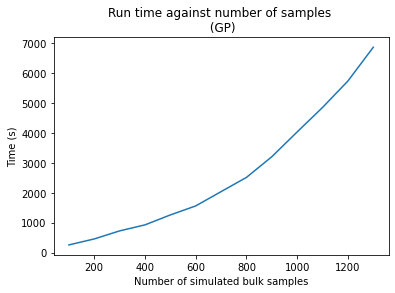

In [12]:
# Plot run-time
plt.plot(evaluation_resuts_df.n_samples.to_numpy(), evaluation_resuts_df.fit_time.to_numpy())
plt.xlabel("Number of simulated bulk samples")
plt.ylabel("Time (s)")
plt.title("Run time against number of samples \n (GP)")
plt.savefig("../results/runtime_vs_bulk-vary_n-gp.png", dpi=300)

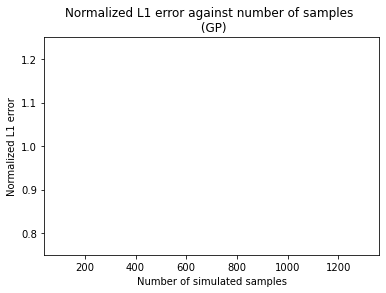

In [13]:
# Plot L1 loss
plt.plot(evaluation_resuts_df.n_samples.to_numpy(), evaluation_resuts_df.l1_error_norm.to_numpy())
plt.xlabel("Number of simulated samples")
plt.ylabel("Normalized L1 error")
plt.title("Normalized L1 error against number of samples \n (GP)")
plt.ylim(0.75,1.25)
plt.savefig("../results/NormL1_vs_bulk-vary_n-gp.png", dpi=300)